In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


### Data Analysis

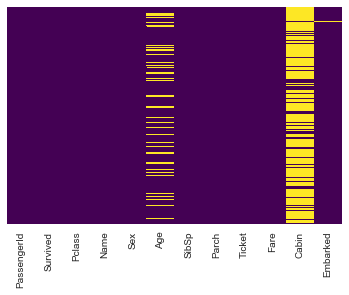

In [2]:
train=pd.read_csv("/Users/inndata_flutter/Documents/GitHub/100-Days-Of-ML-Code/datasets/titanic_train.csv")
sns.set_style('whitegrid')
sns.heatmap(train.isnull(),cmap='viridis',cbar=False,yticklabels=False)

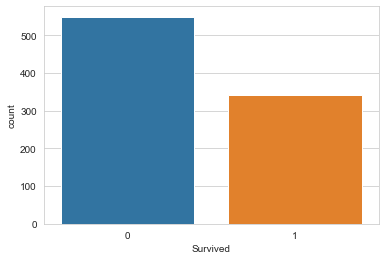

In [3]:
sns.countplot(x='Survived',data=train)

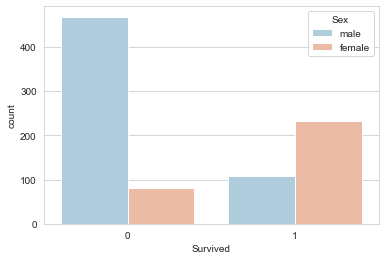

In [4]:
sns.countplot(x='Survived',data=train,hue='Sex',palette='RdBu_r')

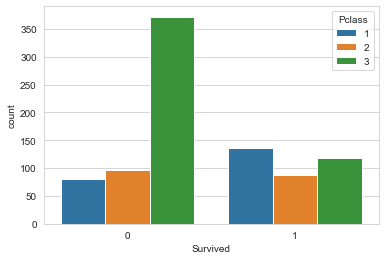

In [5]:
sns.countplot(x='Survived',data=train,hue='Pclass')

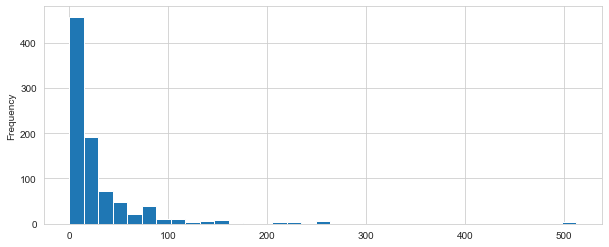

In [6]:
#You can see plot of age using any of these two methods
#distplot takes an array in which we drop null values, and added more bins to be visually good.
#sns.distplot(train['Age'].dropna(),kde=False,bins=30)
train['Fare'].plot.hist(bins=35,figsize=(10,4))

### Interactive graphs

In [9]:
import cufflinks as cf
cf.go_offline()
train['Fare'].iplot(kind='hist',bins=40)

### Data processing and cleaning

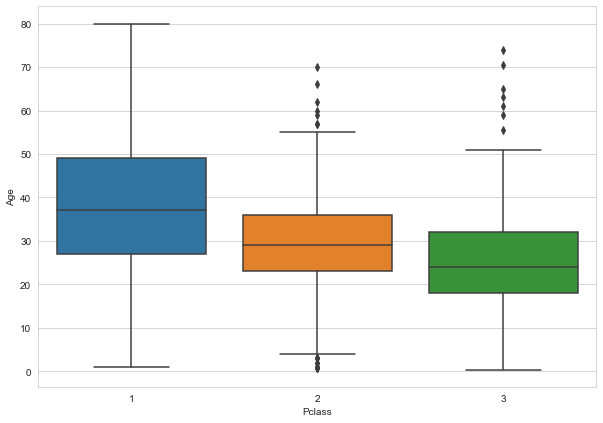

In [11]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train)

In [12]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 38
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [13]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

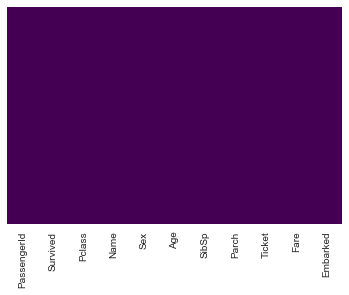

In [19]:
sns.heatmap(train.isnull(),yticklabels=False,cmap='viridis',cbar=False)

### Dropping Cabin column because it has too many missing points.

In [15]:
train.drop('Cabin',inplace=True,axis=1)
sns.heatmap(train.isnull(),yticklabels=False,cmap='viridis',cbar=False)

In [18]:
# dropping the null Embarked value
train.dropna(inplace=True)

In [22]:
# Converting categorical data

sex=pd.get_dummies(train['Sex'],drop_first=True)
embark=pd.get_dummies(train['Embarked'],drop_first=True)

In [23]:
train=pd.concat([train,sex,embark],axis=1)
train.head()

#### Dropping unused columns

In [29]:
train.drop(['Sex','Embarked','Name','Ticket','PassengerId'],axis=1,inplace=True)

### Training the data

In [31]:
#Features
X=train.drop('Survived',axis=1) 
#Label
y=train['Survived'] 

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [38]:
from sklearn.linear_model import LogisticRegression

logregression=LogisticRegression(max_iter=800)
logregression.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=800,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
predictions=logregression.predict(X_test)

### Seeing the results

In [40]:
# Seeing the whole report
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

precision    recall  f1-score   support

           0       0.83      0.92      0.87       163
           1       0.85      0.70      0.77       104

    accuracy                           0.84       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.84      0.84      0.83       267



In [41]:
# Seeing only confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[150,  13],
       [ 31,  73]])